# HR-Analytics-Predicting-and-Understanding-Employee-Attrition

## 1 Phase - Data Management

0. To export datasets

In [118]:
import pandas as pd

In [119]:
att = pd.read_csv("C:/Users/WENCESLAO/Desktop/Data Science Project/2.PROJECT HR ANALYTICS/Dataset/Emp_Attrition.csv")


In [120]:
demo = pd.read_csv("C:/Users/WENCESLAO/Desktop/Data Science Project/2.PROJECT HR ANALYTICS/Dataset/Emp_Demo.csv")


In [121]:
inc = pd.read_csv("C:/Users/WENCESLAO/Desktop/Data Science Project/2.PROJECT HR ANALYTICS/Dataset/Emp_Income.csv")


In [122]:
det = pd.read_csv("C:/Users/WENCESLAO/Desktop/Data Science Project/2.PROJECT HR ANALYTICS/Dataset/Emp_Job Details.csv")

1. We will fix issues and erros we have found, like datatype, blank cells and NaN.
2. We start checking empty value and if possible identifying which values.

In [123]:
# Counting how empty or blanks cells we have in our master data.
empty = inc.isna().sum().sum()
empty

2

In [124]:
b = inc[inc["EmpId"].isin([100015, 100038])]
b

,EmpId,StandardHours,HourlyRate,MonthlyIncome,PercentSalaryHike,StockOptionLevel
14,100015,200,NaN,,14,0
37,100038,200,NaN,,13,0


In [125]:
# We use 0 Value, but we can drop both rows.
inc.loc[14, "MonthlyIncome"] = "0"
inc.loc[37, "MonthlyIncome"] = "0"
inc.loc[14, "HourlyRate"] = "0"
inc.loc[37, "HourlyRate"] = "0"
c = inc[inc["EmpId"].isin([100015, 100038])]
c

C:\Users\WENCESLAO\AppData\Local\Temp\ipykernel_2872\3110715961.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inc.loc[14, "HourlyRate"] = "0"


,EmpId,StandardHours,HourlyRate,MonthlyIncome,PercentSalaryHike,StockOptionLevel
14,100015,200,0,0,14,0
37,100038,200,0,0,13,0


In [126]:
# To find duplicates values
det.duplicated().sum()
duplicates = det[det.duplicated()]
duplicates

,EmpId,BusinessTravel,Department,JobLevel,JobRole,JobSatisfaction,NumCompaniesWorked,PerformanceRating,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTime
149,100145,Travel_Frequently,Sales,2,Sales Executive,4,0,3,200,9,2,4,8,7,0,7,No


In [127]:
# To drop value that we will not use.
det = det.drop(index=148)


In [128]:
# We create a view to check if we have eliminated our duplicate row. Index will show our row deleted.
rows = det.iloc[[146,147,148,149]]
rows

,EmpId,BusinessTravel,Department,JobLevel,JobRole,JobSatisfaction,NumCompaniesWorked,PerformanceRating,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTime
146,100143,Travel_Rarely,Research & Development,2,Research Scientist,3,3,4,200,19,2,3,3,2,2,2,Yes
147,100144,Travel_Rarely,Research & Development,1,Research Scientist,3,1,3,200,5,4,2,5,4,0,4,No
149,100145,Travel_Frequently,Sales,2,Sales Executive,4,0,3,200,9,2,4,8,7,0,7,No
150,100146,Travel_Rarely,Research & Development,1,Research Scientist,1,5,3,200,8,3,3,3,2,2,2,No


3. We will merge att and demo. Then, inc and det.
4. We will create our master_data, followed by info().

In [129]:
new1 = pd.merge(att,demo, on = 'EmpId')

In [130]:
new2 = pd.merge(inc,det, on = 'EmpId')

In [131]:
master_data = pd.merge(new1,new2, on = 'EmpId')
pd.options.display.max_columns = 100
master_data.head(6)

,EmpId,Attrition,Department_x,Age,DistanceFromHome,Education,EducationField,Gender,MaritalStatus,StandardHours_x,HourlyRate,MonthlyIncome,PercentSalaryHike,StockOptionLevel,BusinessTravel,Department_y,JobLevel,JobRole,JobSatisfaction,NumCompaniesWorked,PerformanceRating,StandardHours_y,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTime
0,100001,Yes,Sales,41,1,2,Life Sciences,Female,Single,200,30.0,5993,11,0,Travel_Rarely,Sales,2,Sales Executive,4,8,3,200,8,0,1,6,4,0,5,Yes
1,100002,No,Research & Development,49,8,1,Life Sciences,Male,Married,200,26.0,5130,23,1,Travel_Frequently,Research & Development,2,Research Scientist,2,1,4,200,10,3,3,10,7,1,7,No
2,100003,Yes,Research & Development,37,2,2,Other,Male,Single,200,10.0,2090,15,0,Travel_Rarely,Research & Development,1,Laboratory Technician,3,6,3,200,7,3,3,0,0,0,0,Yes
3,100004,No,Research & Development,33,3,4,Life Sciences,Female,Married,200,15.0,2909,11,0,Travel_Frequently,Research & Development,1,Research Scientist,3,1,3,200,8,3,3,8,7,3,0,Yes
4,100005,No,Research & Development,27,2,1,Medical,Male,Married,200,17.0,3468,12,1,Travel_Rarely,Research & Development,1,Laboratory Technician,2,9,3,200,6,3,3,2,2,2,2,No
5,100006,No,Research & Development,32,2,2,Life Sciences,Male,Single,200,15.0,3068,13,0,Travel_Frequently,Research & Development,1,Laboratory Technician,4,0,3,200,8,2,2,7,7,3,6,No


# EXTRA EXTRA

In [132]:
#Binary¨: Attrition, Gender, OverTime

In [133]:
master_data["Attrition"] = master_data["Attrition"].apply(lambda x: 1 if x == 'Yes' else 0)
master_data["Gender"] = master_data["Gender"].apply(lambda x: 1 if x == 'Male' else 0)
master_data["OverTime"] = master_data["OverTime"].apply(lambda x: 1 if x == 'Yes' else 0)

In [134]:
master_data.Education.value_counts()
master_data.JobLevel.value_counts()
master_data.JobRole.value_counts()
master_data.StandardHours_x.value_counts()
master_data.StockOptionLevel.value_counts()
master_data.MaritalStatus.value_counts()
master_data.BusinessTravel.value_counts()
master_data.EducationField.value_counts()
master_data.Education.value_counts()


Education
3    573
4    398
2    285
1    170
5     49
Name: count, dtype: int64

We will create extra columns based on: BusinessTravel, Departmen_x, EducationField, JobRole, MaritalStatus (Boolean whichi will be later converted to numerical values)

In [135]:
master_data = master_data.join(pd.get_dummies(master_data["BusinessTravel"])).drop('BusinessTravel', axis=1)
master_data = master_data.join(pd.get_dummies(master_data["Department_x"], prefix='Department')).drop('Department_x', axis=1)
master_data = master_data.join(pd.get_dummies(master_data["EducationField"], prefix='EducationField')).drop('EducationField', axis=1)
master_data = master_data.join(pd.get_dummies(master_data["JobRole"], prefix='JobR')).drop('JobRole', axis=1)
master_data = master_data.join(pd.get_dummies(master_data["MaritalStatus"], prefix='MaritalStat')).drop('MaritalStatus', axis=1)

In [136]:
# Boolean being managed
master_data = master_data.map(lambda x: 1 if x is True else 0 if x is False else x)
master_data.sample(3)

,EmpId,Attrition,Age,DistanceFromHome,Education,Gender,StandardHours_x,HourlyRate,MonthlyIncome,PercentSalaryHike,StockOptionLevel,Department_y,JobLevel,JobSatisfaction,NumCompaniesWorked,PerformanceRating,StandardHours_y,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTime,Non-Travel,Travel_Frequently,Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobR_Healthcare Representative,JobR_Human Resources,JobR_Laboratory Technician,JobR_Manager,JobR_Manufacturing Director,JobR_Research Director,JobR_Research Scientist,JobR_Sales Executive,JobR_Sales Representative,MaritalStat_Divorced,MaritalStat_Married,MaritalStat_Single
639,100635,0,25,3,1,1,200,21.0,4194,18,0,Sales,2,1,1,3,200,5,3,3,5,3,0,3,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1063,101059,1,34,24,4,0,200,23.0,4599,23,0,Sales,2,2,0,1,200,16,2,4,15,9,10,10,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
750,100746,0,55,18,4,1,200,32.0,6385,14,2,Research & Development,2,2,3,3,200,17,3,3,8,7,6,7,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [137]:
# Repeated values in Department_x and Department_y. We will drop one of them.
master_data = master_data.drop('Department_y', axis=1)
# Empid does not give us any valuable information
master_data = master_data.drop('EmpId', axis=1)
# There are two variables: StandarHours_x and StandardHours_y which do not give us any valuable information.
master_data = master_data.drop('StandardHours_x', axis=1)
master_data = master_data.drop('StandardHours_y', axis=1)

In [138]:
master_data.sample(2)

,Attrition,Age,DistanceFromHome,Education,Gender,HourlyRate,MonthlyIncome,PercentSalaryHike,StockOptionLevel,JobLevel,JobSatisfaction,NumCompaniesWorked,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTime,Non-Travel,Travel_Frequently,Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobR_Healthcare Representative,JobR_Human Resources,JobR_Laboratory Technician,JobR_Manager,JobR_Manufacturing Director,JobR_Research Director,JobR_Research Scientist,JobR_Sales Executive,JobR_Sales Representative,MaritalStat_Divorced,MaritalStat_Married,MaritalStat_Single
949,0,28,1,3,0,33.0,6674,11,3,2,4,0,3,10,6,3,9,8,7,5,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
909,0,48,1,3,1,91.0,18265,12,0,5,4,6,3,25,3,4,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


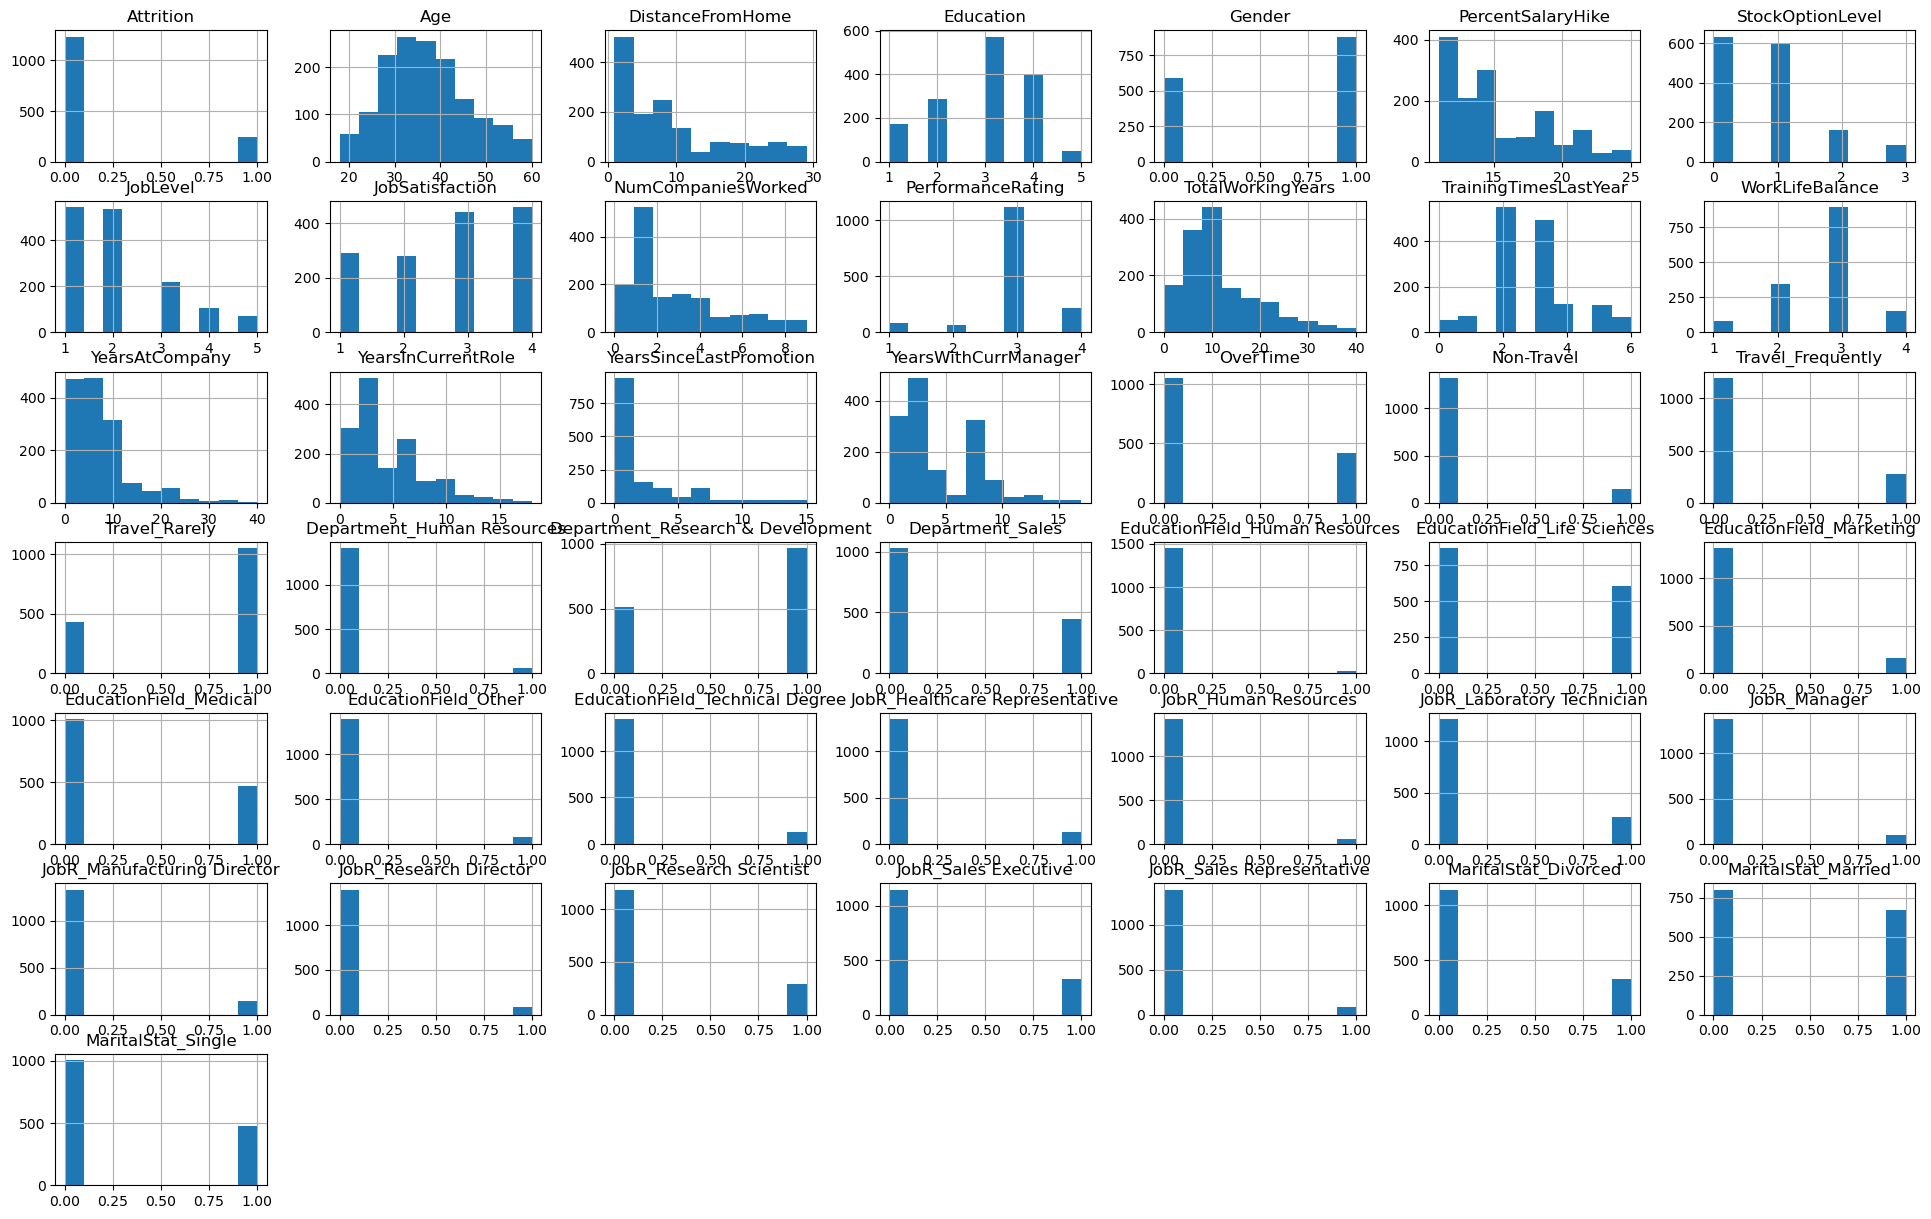

In [139]:
import matplotlib.pyplot as plt

master_data.hist(figsize=(24,15))
plt.show()

In [ ]:
# las dos columans que faltan estan abajo porque no las he ejecutado todavia jaja


5. Datatype is incorrect for MonthlyIncome and HourlyRate. We proceed to change it as float

In [21]:
master_data["MonthlyIncome"] = master_data["MonthlyIncome"].astype("int64")
master_data["HourlyRate"] = master_data["HourlyRate"].astype("int64")
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmpId                    1475 non-null   int64 
 1   Attrition                1475 non-null   object
 2   Department_x             1475 non-null   object
 3   Age                      1475 non-null   int64 
 4   DistanceFromHome         1475 non-null   int64 
 5   Education                1475 non-null   int64 
 6   EducationField           1475 non-null   object
 7   Gender                   1475 non-null   object
 8   MaritalStatus            1475 non-null   object
 9   StandardHours_x          1475 non-null   int64 
 10  HourlyRate               1475 non-null   int64 
 11  MonthlyIncome            1475 non-null   int64 
 12  PercentSalaryHike        1475 non-null   int64 
 13  StockOptionLevel         1475 non-null   int64 
 14  BusinessTravel           1475 non-null  

6. Finally, we detect our attrition rate using the formula and obtaining a %

In [27]:
attrition_rate = (master_data['Attrition'].value_counts()['Yes'] / len(master_data)) * 100

print(f"Overall Attrition Rate: {attrition_rate:.2f}%")

Overall Attrition Rate: 16.14%


## 2 Phase - Data Analysis

1. We will select the items which could give us a meaningful result using Whisker-Box Plot
In this case: 
Age, 
DistanceFromHome, 
HourlyRate, 
MonthlyIncome, 
TotalWorkingYears, 
NumCompaniesWorked, 
YearsAtCompany, 
YearsInCurrentRole, 
YearsSinceLastPromotion, 
YearsWithCurrManager, 
TrainingTimesLastYear


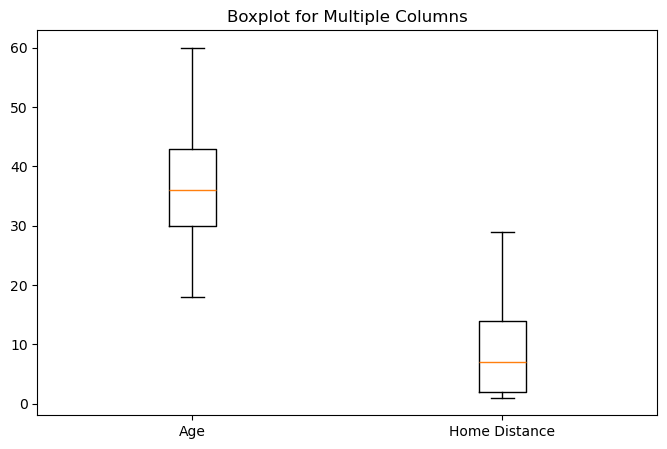

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.boxplot([master_data['Age'], master_data['DistanceFromHome']], labels=['Age', 'Home Distance'])
plt.title('Boxplot for Multiple Columns')
plt.show()


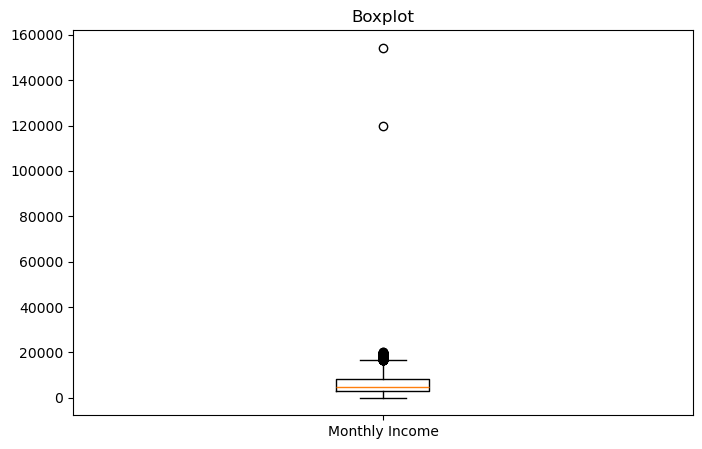

In [47]:
plt.figure(figsize=(8,5))
plt.boxplot(master_data['MonthlyIncome'], labels=['Monthly Income'])
plt.title('Boxplot')
plt.show()

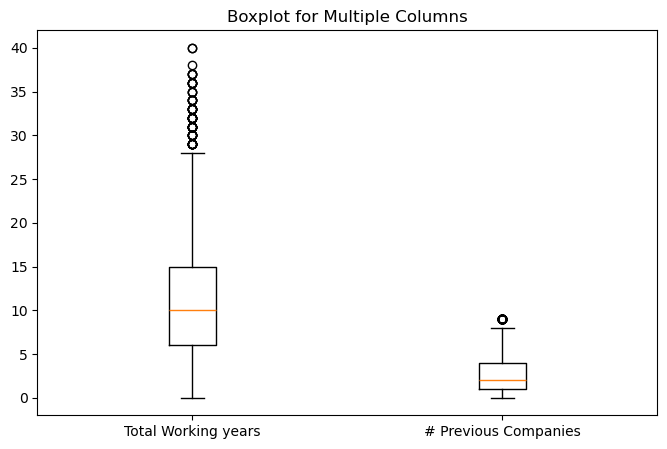

In [36]:
plt.figure(figsize=(8,5))
plt.boxplot([master_data['TotalWorkingYears'], master_data['NumCompaniesWorked']], labels=['Total Working years', '# Previous Companies'])
plt.title('Boxplot for Multiple Columns')
plt.show()

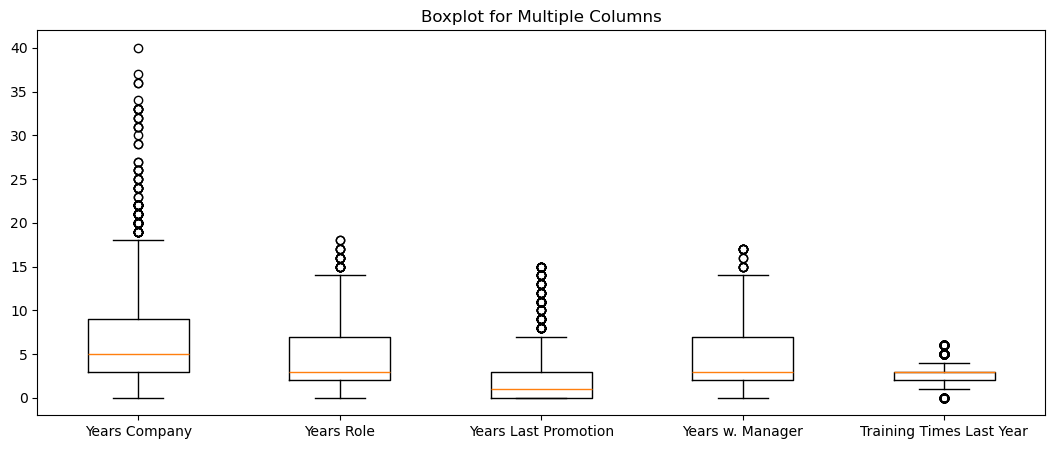

In [35]:
plt.figure(figsize=(13,5))
plt.boxplot([master_data['YearsAtCompany'], master_data['YearsInCurrentRole'], master_data['YearsSinceLastPromotion'],master_data['YearsWithCurrManager']
,master_data['TrainingTimesLastYear']], labels=['Years Company', 'Years Role','Years Last Promotion','Years w. Manager','Training Times Last Year'])
plt.title('Boxplot for Multiple Columns')
plt.show()

In [49]:
master_data.sample(3)

,EmpId,Attrition,Department_x,Age,DistanceFromHome,Education,EducationField,Gender,MaritalStatus,StandardHours_x,...,PerformanceRating,StandardHours_y,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTime
1434,101430,No,Research & Development,39,24,1,Life Sciences,Male,Single,200,...,3,200,18,2,3,7,7,1,7,No
669,100665,No,Research & Development,36,14,1,Life Sciences,Male,Married,200,...,3,200,17,2,2,16,8,4,11,Yes
1033,101029,No,Research & Development,41,5,5,Medical,Male,Married,200,...,3,200,7,5,2,4,2,0,3,Yes


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

2. Box Whisker plot grouped by attrition:


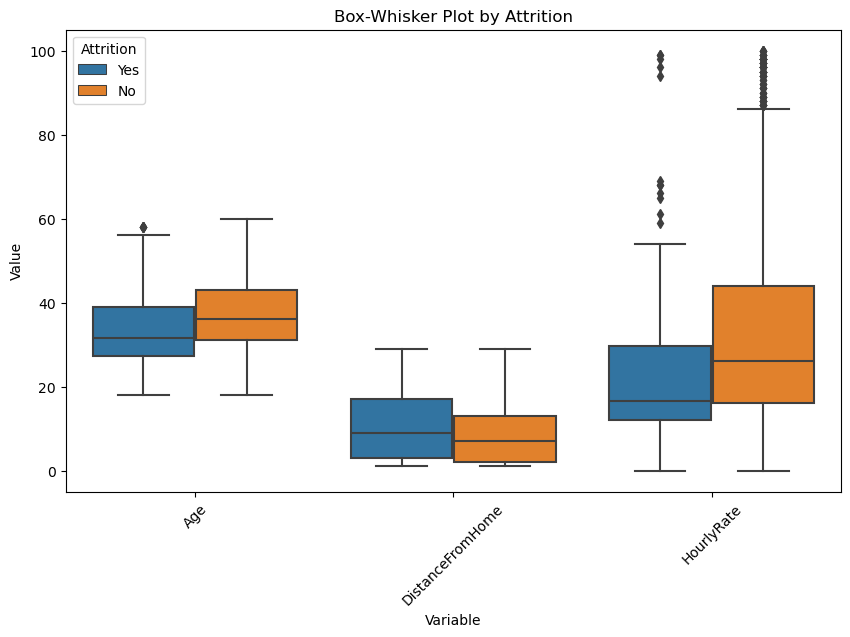

In [69]:
# We will identify a number of numeric_cols
numeric_cols = ['Age','DistanceFromHome','HourlyRate']

# Melt dataframe for seaborn
df_melted = master_data.melt(id_vars='Attrition', value_vars=numeric_cols, var_name='Variable', value_name='Value')

# Create boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Variable', y='Value', hue='Attrition', data=df_melted)
plt.title('Box-Whisker Plot by Attrition')
plt.xticks(rotation=45)  # rotate labels if many variables
plt.show()


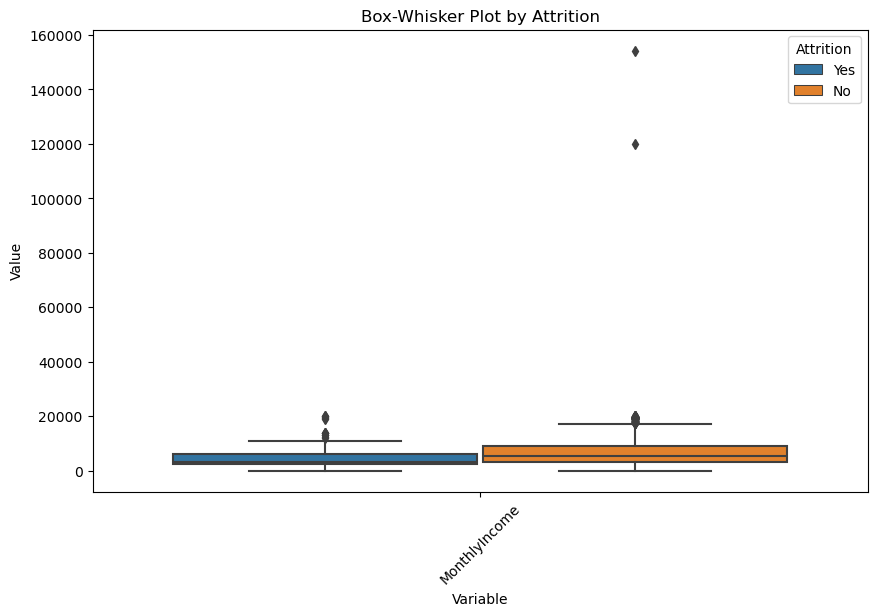

In [68]:
# We will identify a number of numeric_cols
numeric_cols2 = ['MonthlyIncome']

# Melt dataframe for seaborn
df_melted = master_data.melt(id_vars='Attrition', value_vars=numeric_cols2, var_name='Variable', value_name='Value')

# Create boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Variable', y='Value', hue='Attrition', data=df_melted)
plt.title('Box-Whisker Plot by Attrition')
plt.xticks(rotation=45)  # rotate labels if many variables
plt.show()

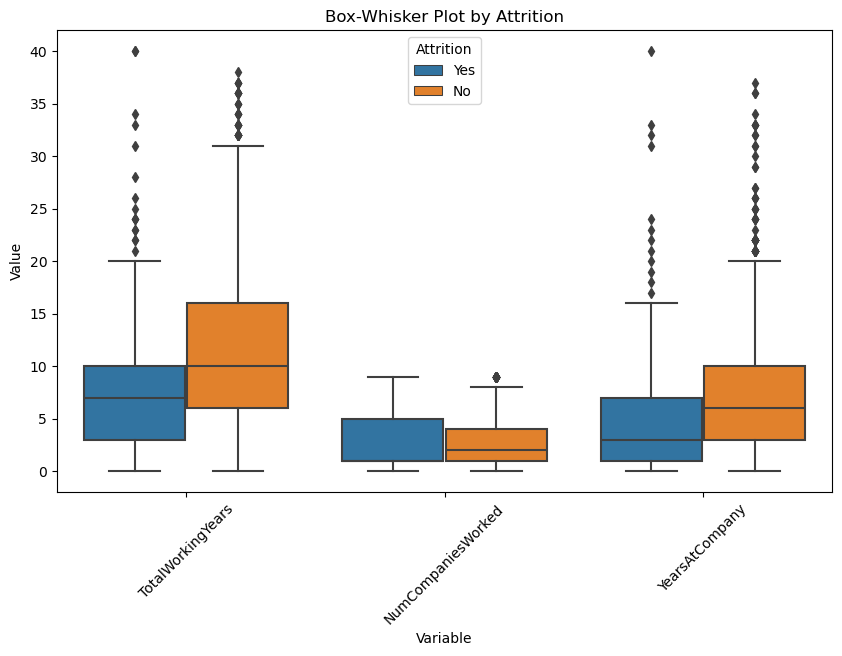

In [67]:
# We will identify a number of numeric_cols
numeric_cols3 = ['TotalWorkingYears', 'NumCompaniesWorked', 'YearsAtCompany']

# Melt dataframe for seaborn
df_melted = master_data.melt(id_vars='Attrition', value_vars=numeric_cols3, var_name='Variable', value_name='Value')

# Create boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Variable', y='Value', hue='Attrition', data=df_melted)
plt.title('Box-Whisker Plot by Attrition')
plt.xticks(rotation=45)  # rotate labels if many variables
plt.show()

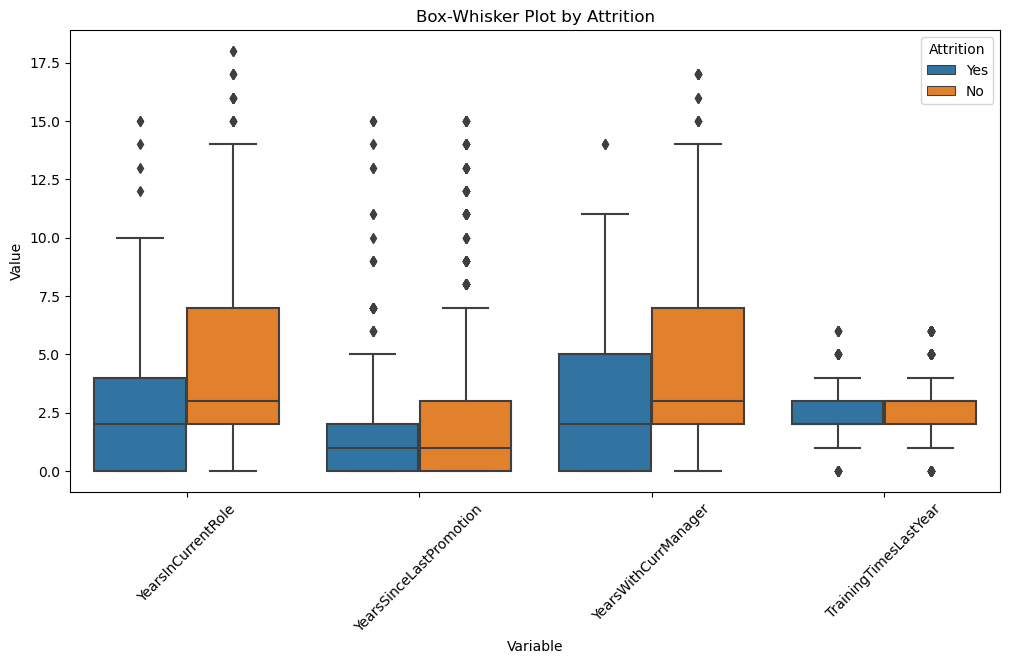

In [66]:
# We will identify a number of numeric_cols
numeric_cols4 = ['YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TrainingTimesLastYear']

# Melt dataframe for seaborn
df_melted = master_data.melt(id_vars='Attrition', value_vars=numeric_cols4, var_name='Variable', value_name='Value')

# Create boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='Variable', y='Value', hue='Attrition', data=df_melted)
plt.title('Box-Whisker Plot by Attrition')
plt.xticks(rotation=45)  # rotate labels if many variables
plt.show()